<h1>DSGT: Principal Component Analysis 

PCA is a hugely popular dimensionality reduction technique often used for data visualization. (Visualizing in 3 or more dimennsions is hard -- if not impossible!)

Principal Component Analysis is an eigenvector-based multivariate analysis algorithm. Essentially, it finds linear combinations of old features (principal components) that best describe the variance in your data. Since each PC is orthogonal to the other, each are statistically independant. They can also be used to redefine axis to reorient to the most informative viewpoint for visualization.

##### Here we will experiment with PCA using sklearn. We will:
* Access/manipulate data using numpy/pandas 
* Perform PCA using sklearn, and 
* Visualize findings using Matplitlib


Import necessary libraries and methods.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA


Load Iris dataset. Our classes are setosa, versicolour, and virginica.
Split data into data samples and labels

In [2]:
iris = datasets.load_iris()
x = iris.data
y = iris.target

#shows the iris samples in a table:
samples = pd.DataFrame(data = x, columns = ['Sepal length','Sepal width','Petal length','Petal width'])
samples

,Sepal length,Sepal width,Petal length,Petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


Standardize the data (for magnitudes), then fit your model.   
Then apply PCA to get 2 components:

##### Question:
* What do these values represent?

In [3]:
pca.components_

NameError: name 'pca' is not defined

In [ ]:
x = StandardScaler().fit_transform(x)
pca = PCA(n_components = 2)
components = pca.fit_transform(x)
#Show principal components in a table:
principals = pd.DataFrame(data = components, columns = ['principal component 1', 'principal component 2'])
print(principals)

Where along PC 1 and PC2 your point lies (coordinates)  

2D visualization of data using first two principal components:

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA for first and second components', fontsize = 20)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text(components[y == label, 0].mean(),
              components[y == label, 1].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
ax.scatter(components[:,0],
            components[:,1],
            c = y,
            s = 50)
ax.grid()

How well is this method performing? How do we tell?   
Use the variance to determine how much information is lost. 


In [ ]:
va = pca.explained_variance_ratio_
print(va)
np.sum(va)
#shows that we lost about 5% of the data

The first two principal components are seen to account for about 96% of the information.

<h3>Comparing Principle Components:

The first two principle components account for most of the data. What if we had three principle components?

#### Question: How many axis will our visualization (using all PCs) have? 

In [4]:
#Add a third component to PCA
pca = PCA(n_components = 3)
components = pca.fit_transform(x)
#Show principal components in a table:
principals = pd.DataFrame(data = components, columns = ['principal component 1', 'principal component 2','principal component 3'])
print(principals)

     principal component 1  principal component 2  principal component 3
0                -2.684207               0.326607              -0.021512
1                -2.715391              -0.169557              -0.203521
2                -2.889820              -0.137346               0.024709
3                -2.746437              -0.311124               0.037672
4                -2.728593               0.333925               0.096230
5                -2.279897               0.747783               0.174326
6                -2.820891              -0.082105               0.264251
7                -2.626482               0.170405              -0.015802
8                -2.887959              -0.570798               0.027335
9                -2.673845              -0.106692              -0.191533
10               -2.506527               0.651935              -0.069275
11               -2.613143               0.021521               0.107650
12               -2.787434              -0.227740  

Plotting the first principle component against the third principle component:

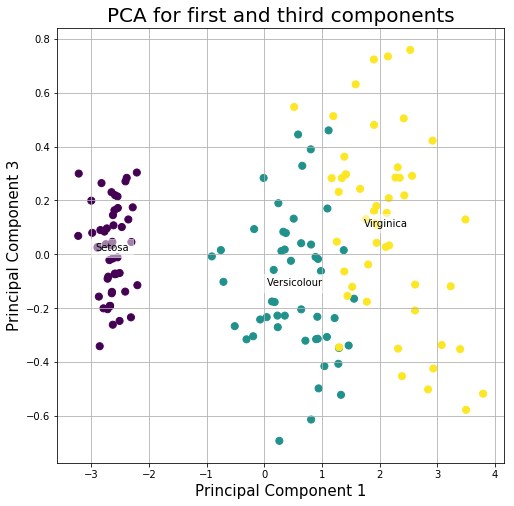

In [5]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('PCA for first and third components', fontsize = 20)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text(components[y == label, 0].mean(),
              components[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
ax.scatter(components[:,0],
            components[:,2],
            c = y,
            s = 50)
ax.grid()

Plotting the second principle component against the third principle component:

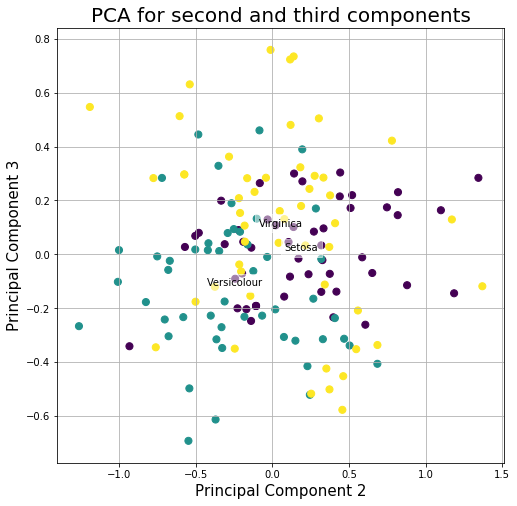

In [6]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 2', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('PCA for second and third components', fontsize = 20)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text(components[y == label, 1].mean(),
              components[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
ax.scatter(components[:,1],
            components[:,2],
            c = y,
            s = 50)
ax.grid()

The new variance for the third principal component accounts for only about 3% of the data, but brings the total up to about 99.5%.

In [7]:
va = pca.explained_variance_ratio_
print(va)
np.sum(va)

[0.92461621 0.05301557 0.01718514]


0.9948169145498101

A 3D plot of the first three principal components

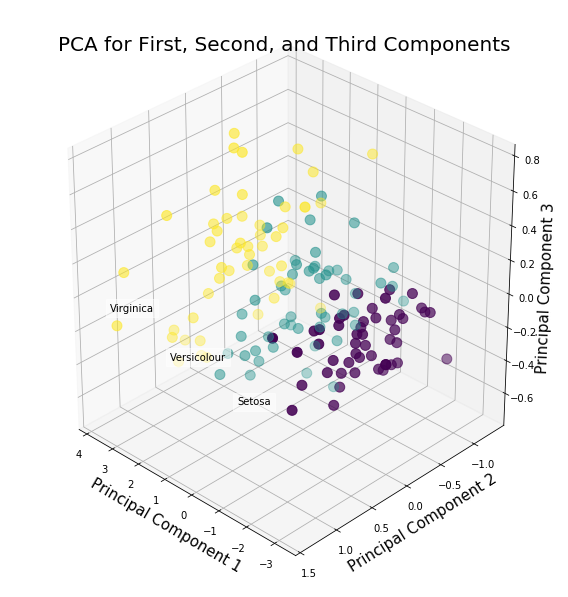

In [8]:
fig = plt.figure(1, figsize=(8,8))
ax = Axes3D(fig, rect=[0,0,.95,1], elev=30, azim=134)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('PCA for First, Second, and Third Components', fontsize = 20)
for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(components[y == label, 0].mean(),
              components[y == label, 1].mean() + 1.5,
              components[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
ax.scatter(components[:,0],
           components[:,1],
           components[:,2],
           c = y,
           s = 100)

What do the first three principal components show about the data? What conclusions can be made?

How might PCA be limited as a data reduction technique?